In [146]:
# Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose #visual representation of seasonal decompose

from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.stattools import adfuller, acf, pacf #ploting acf and pacf graph, adfuller test

!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

In [2]:
import calendar

In [ ]:
# Read Data

In [3]:
df  = pd.read_csv('walmart.csv')

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Use statistical analysis, EDA, outlier analysis, and handle the missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Changing DAte format and set it as an index

In [7]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
#data['Month']=pd.to_datetime(data['Month'])

In [8]:
df.index=df['Date']
del df['Date']

In [ ]:
# Performing EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [10]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667


In [11]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df1 = df[['Store',	'Weekly_Sales',	'Holiday_Flag',	'Temperature',	'Fuel_Price', 'CPI',	'Unemployment']]
         

In [14]:
df1.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<Axes: >

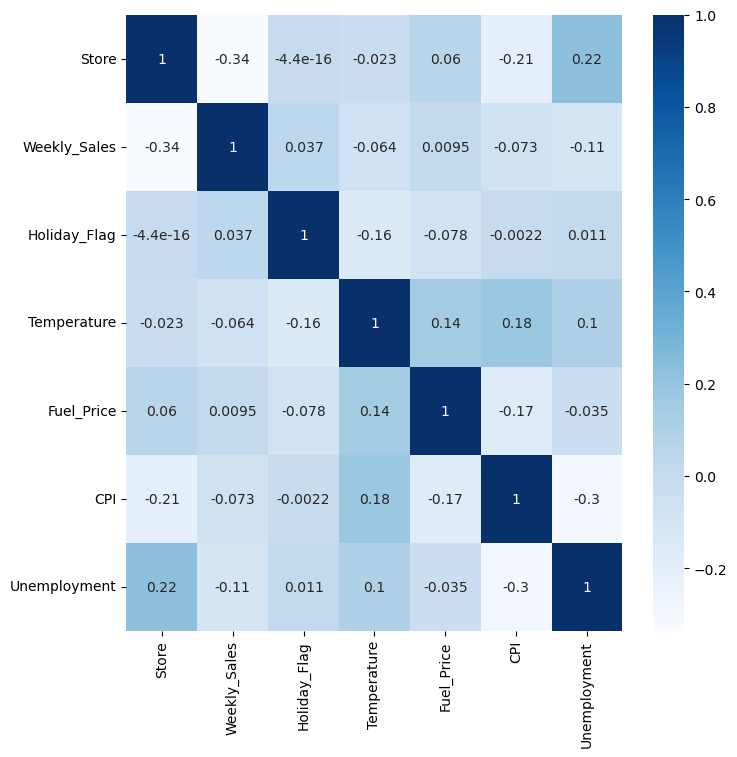

In [15]:
plt.figure(figsize= (8,8))
sns.heatmap(df1.corr(),cmap='Blues',annot=True)
#sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [ ]:
# Cheching for Outliers

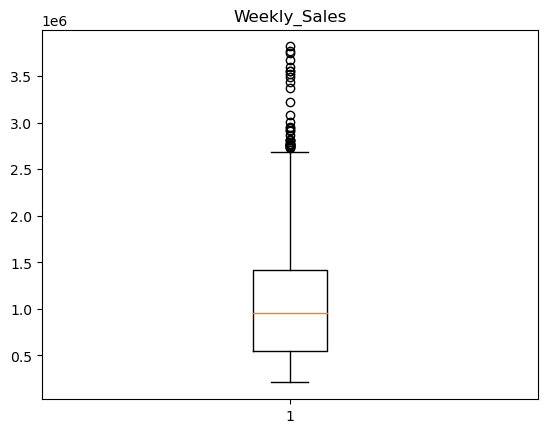

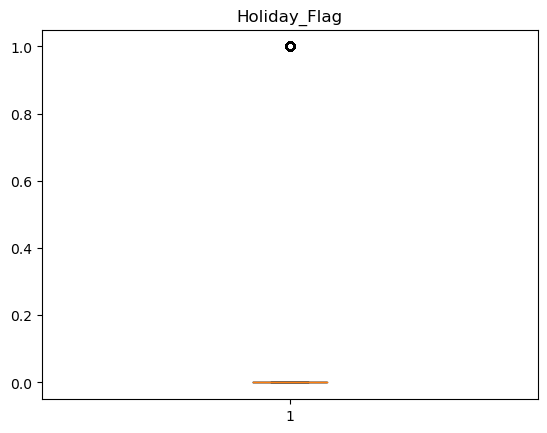

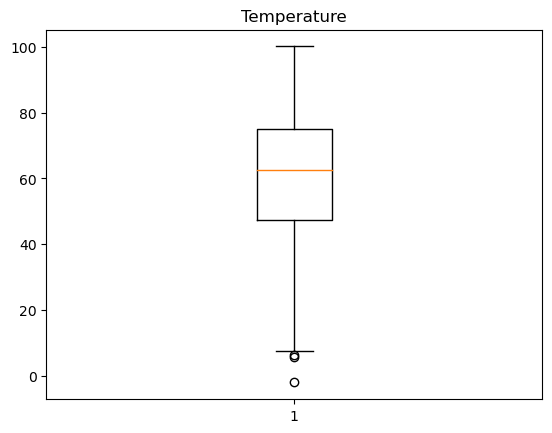

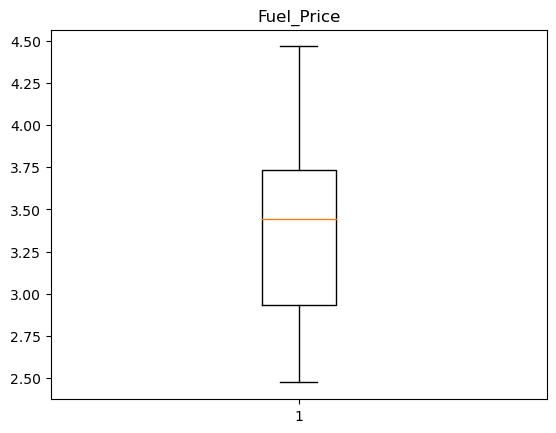

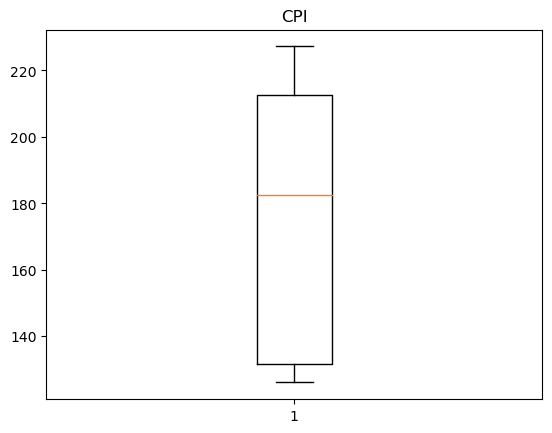

In [16]:
x= ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI']
for i in x:
    if df[i].dtype !='datetime64[ns]':
              
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()

In [ ]:
# Removing Outliers

In [17]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)

In [18]:
IQR = Q3-Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR

In [19]:
df = df[(df['Weekly_Sales'] >= Min) & (df['Weekly_Sales'] <= Max)]

In [20]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667


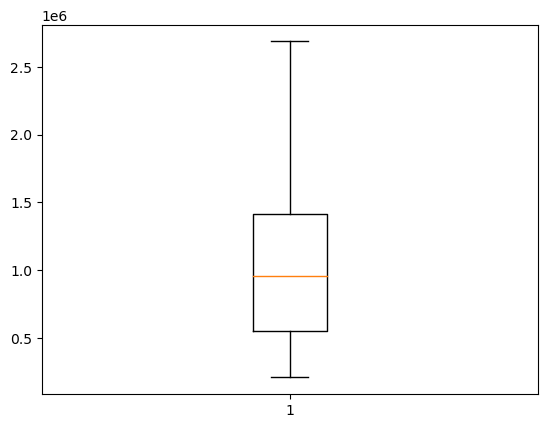

In [21]:
plt.boxplot(df['Weekly_Sales'])
plt.show()

In [22]:
df.loc[df['Weekly_Sales']<=0]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,


If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

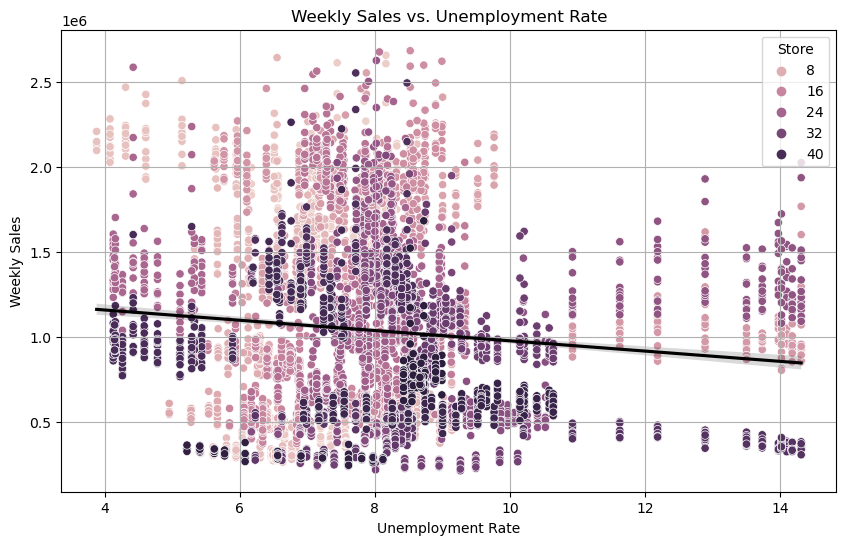

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, hue='Store')
sns.regplot(x='Unemployment', y='Weekly_Sales', data=df, scatter=False, color='black')
plt.title('Weekly Sales vs. Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.legend(title='Store')
plt.grid(True)
plt.show()

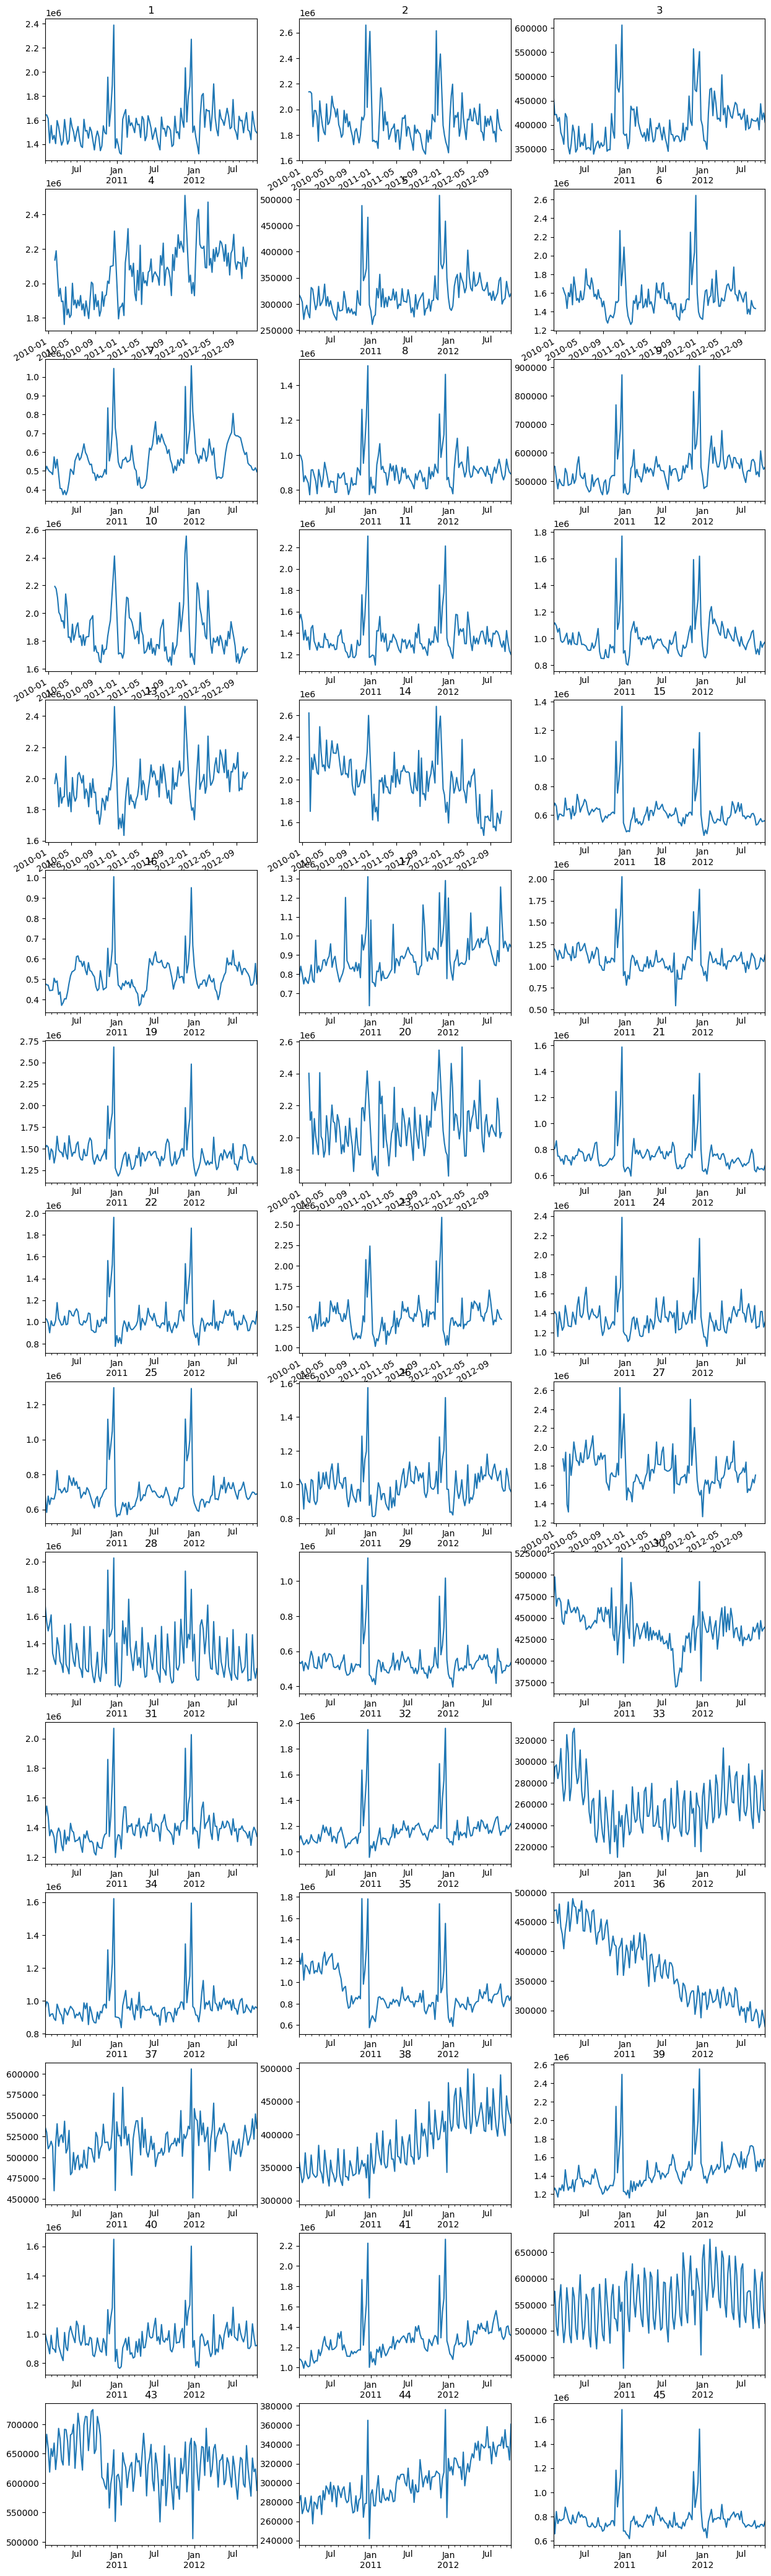

In [25]:
# Storewise Weekly sales
plt.figure(figsize=(15,60))
for store, df_store in df.groupby('Store'):
    data=df_store.groupby('Date')['Weekly_Sales'].sum()
    plt.subplot(15,3,int(store))
    data.plot()
    plt.title(store)
    plt.xlabel(None)
    #plt.ticklabel_format(useOffset=False)
    #plt.xticks(rotation=45)


plt.show()

### If the weekly sales show a seasonal trend, when and what could be the reason?

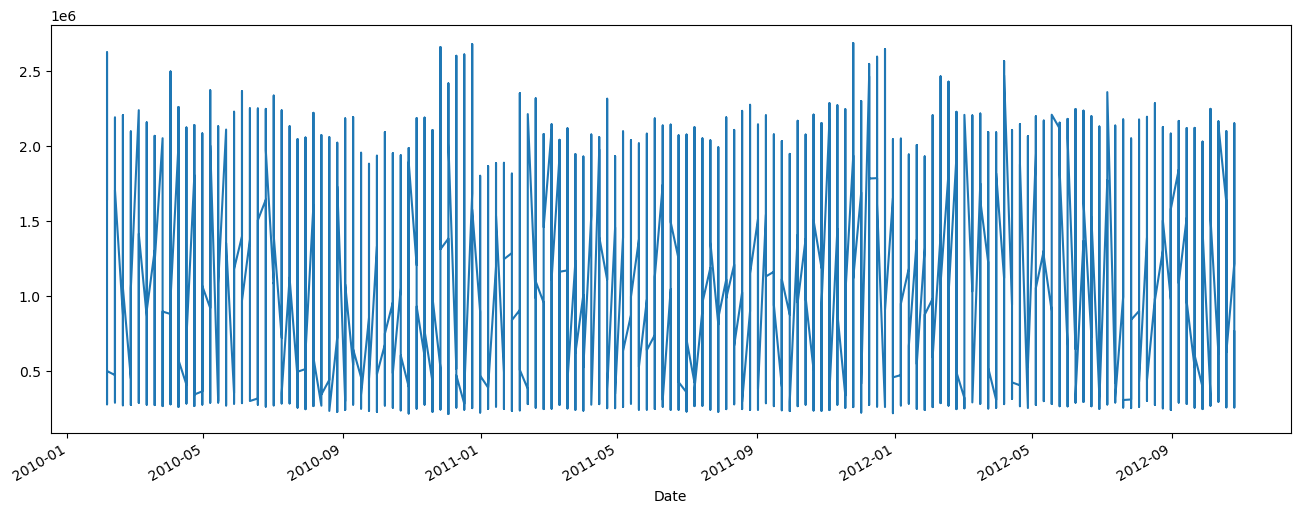

In [28]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

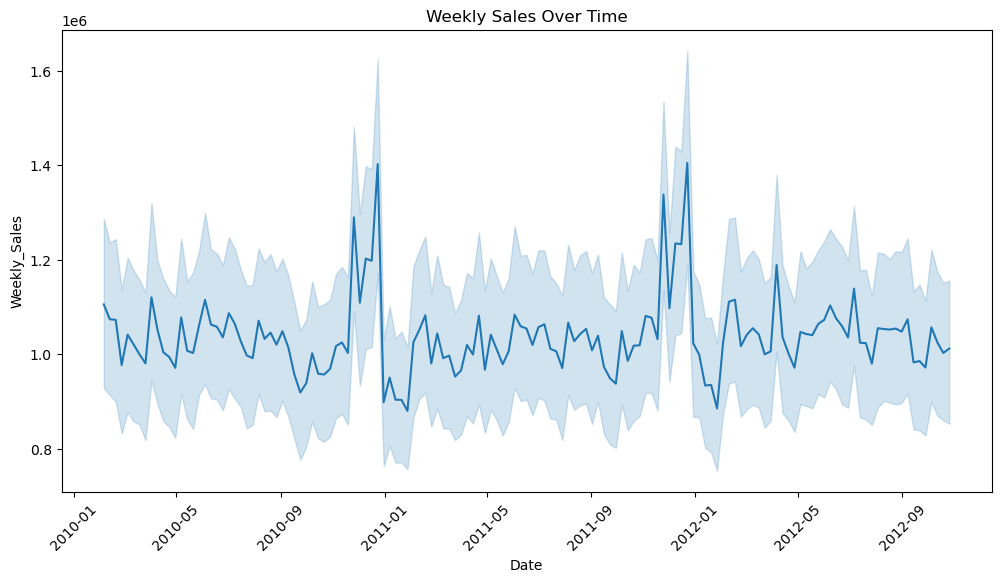

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.xticks(rotation=45)
plt.show()

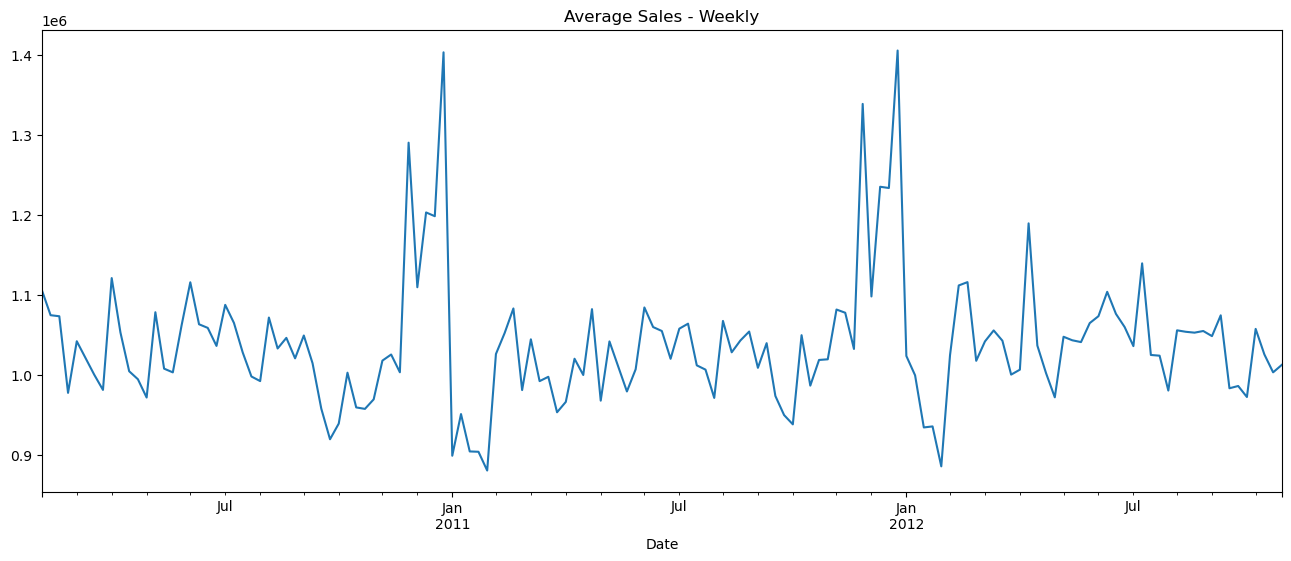

In [30]:
df_week = df.resample('W').mean() #resample data as weekly
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

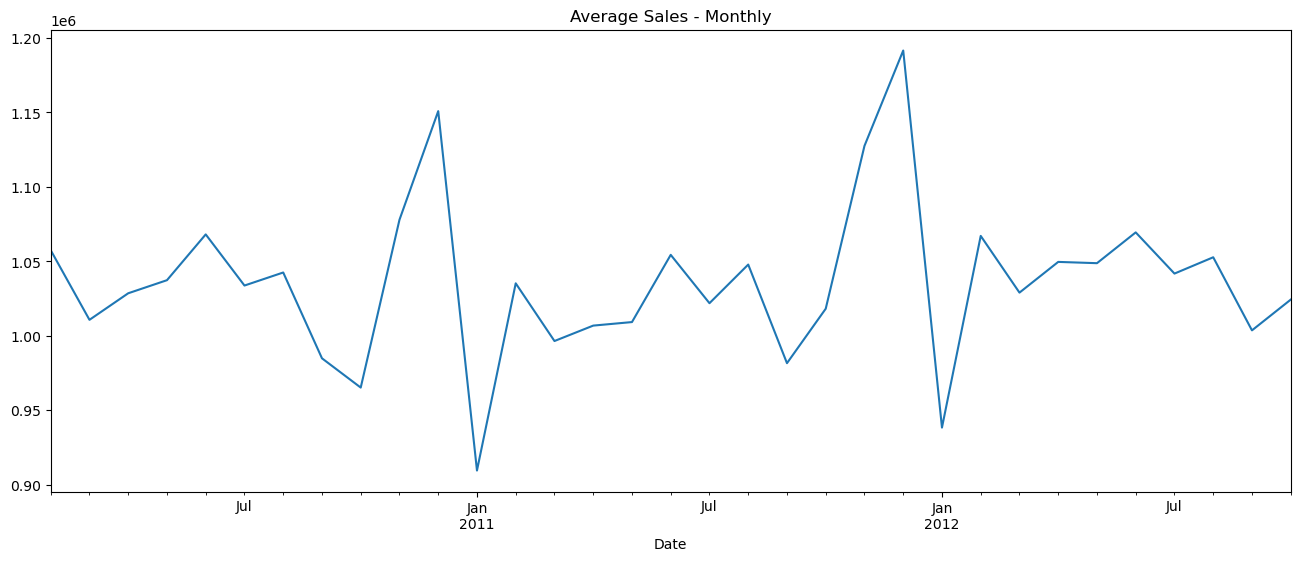

In [31]:
df_month = df.resample('MS').mean() # resampling as monthly
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [ ]:
# To check seasonality and trend 

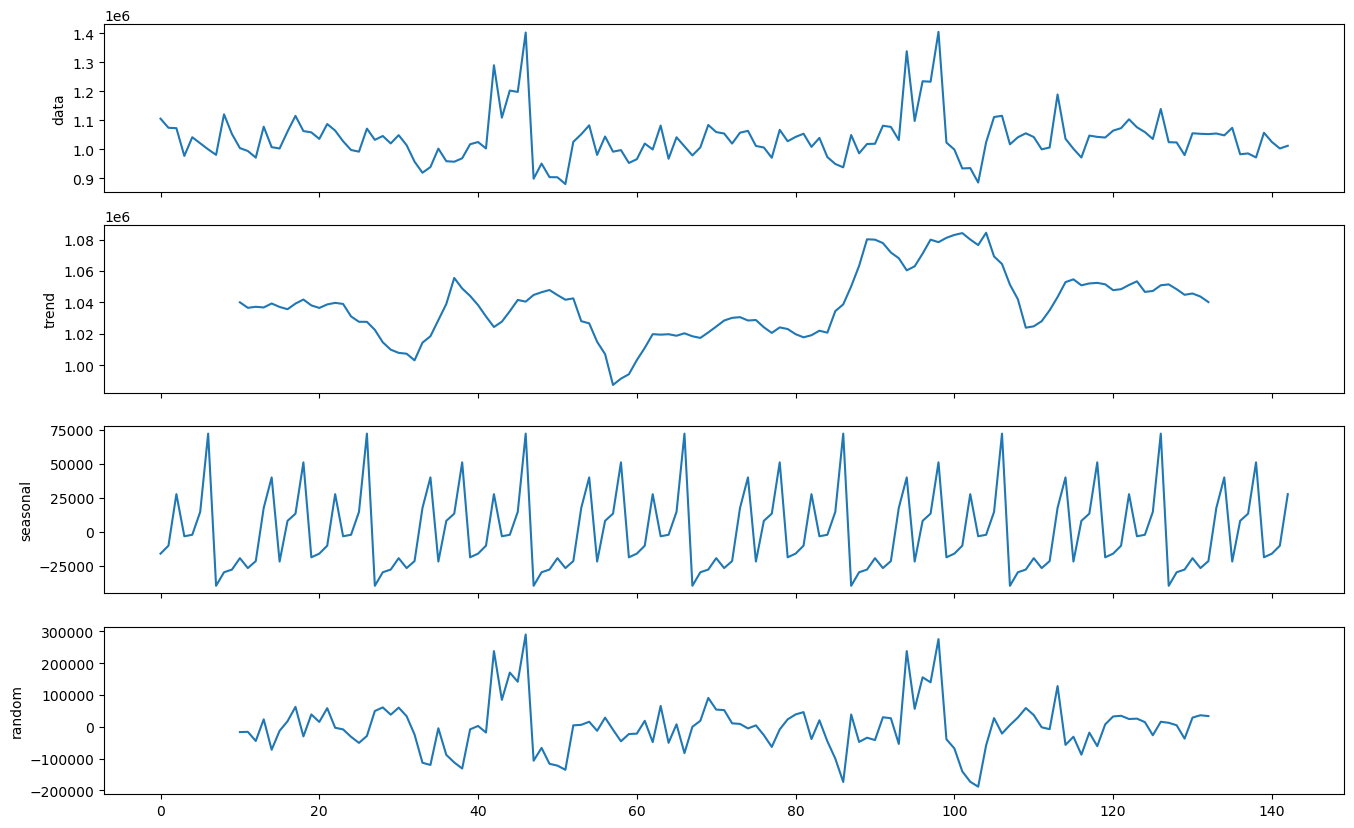

In [32]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

### Weekly sales shows trends around Nov-Jan, the reason could be
1. it could be a holiday season, many discounts and offers availble
2. temperature might be low compare to other months
3. there might be rise of travelling as well
4. Buying and giving of gifts increase because of many festivals in these months such as Diwali, Chritmas, new year.

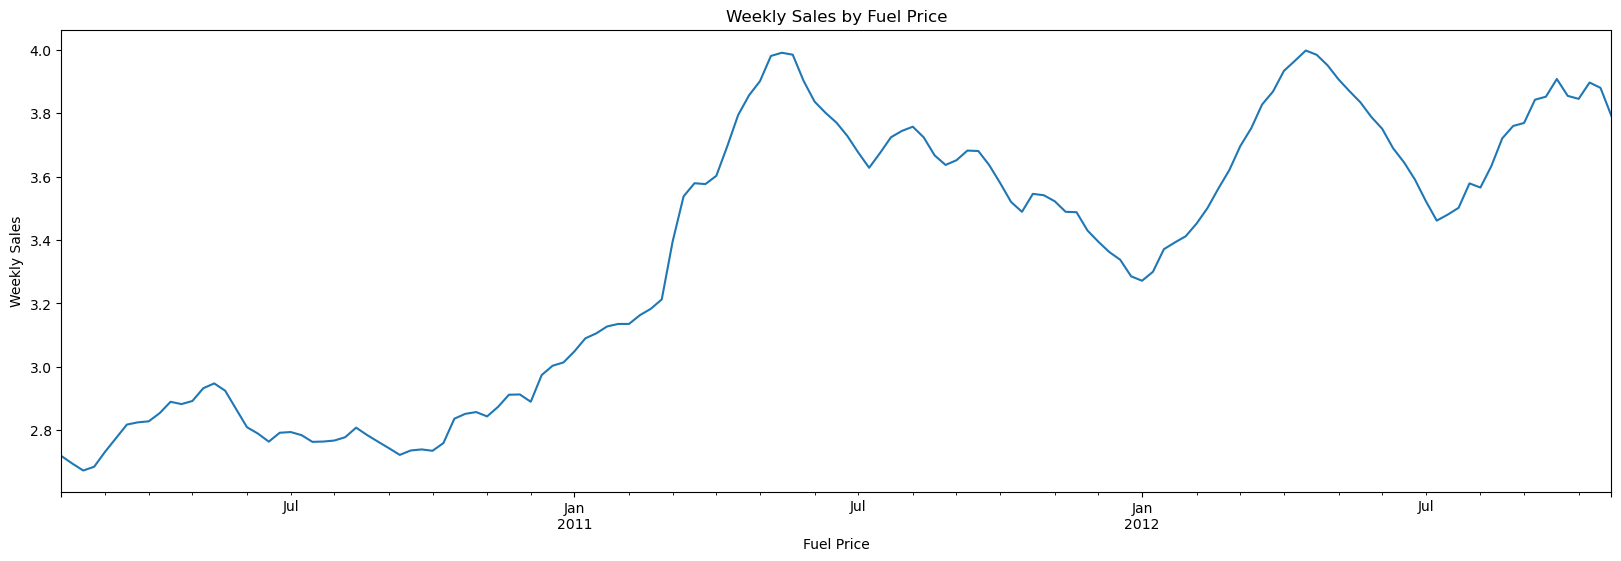

In [34]:
fuel_price = pd.pivot_table(df_week, values = "Weekly_Sales", index= "Fuel_Price")

plt.figure(figsize=(20, 6))  # Adjust the figure size (width, height) in inches
#fuel_price.plot()
df_week['Fuel_Price'].plot()
plt.title('Weekly Sales by Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')

plt.show()

 How is the Consumer Price index affecting the weekly sales of various stores?


<Figure size 1200x600 with 0 Axes>

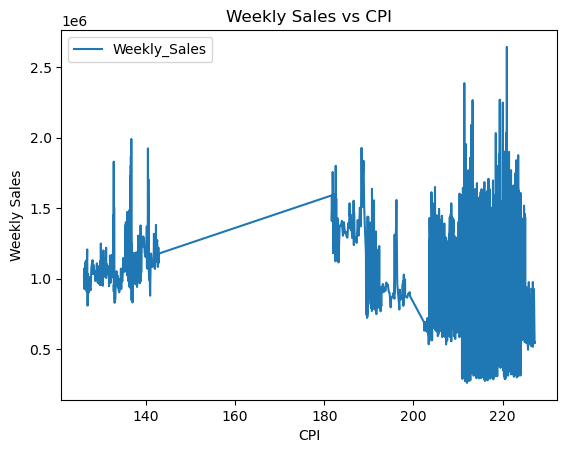

In [36]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
plt.figure(figsize=(12, 6))  # Adjust the figure size (width, height) in inches
fuel_price.plot()
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')

plt.show()

e. Top performing stores according to the historical data.

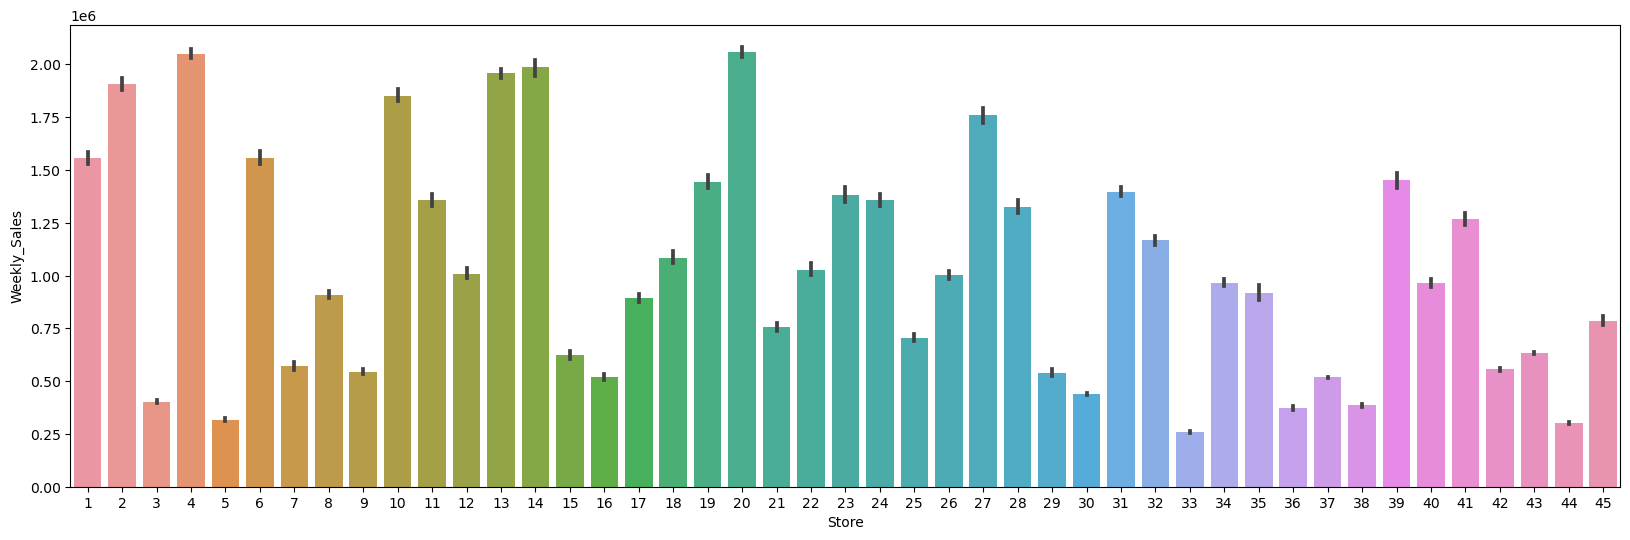

In [38]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

 The worst performing store, and how significant is the difference between the
highest and lowest performing stores

In [40]:
store_sales = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'sum'])

# Find the worst-performing store based on average weekly sales
worst_store = store_sales['mean'].idxmin()
worst_store_sales = store_sales.loc[worst_store]

print(f"Worst Performing Store: {worst_store}")
print(f"Average Weekly Sales: {worst_store_sales['mean']}")
print(f"Total Sales: {worst_store_sales['sum']}")

Worst Performing Store: 33
Average Weekly Sales: 259861.69202797202
Total Sales: 37160221.96


In [41]:
best_store = store_sales['mean'].idxmax()
best_store_sales = store_sales.loc[best_store]

print(f"best Performing Store: {best_store}")
print(f"Average Weekly Sales: {best_store_sales['mean']}")
print(f"Total Sales: {best_store_sales['sum']}")

best Performing Store: 20
Average Weekly Sales: 2058998.0500735294
Total Sales: 280023734.81


In [42]:
sales_diff = best_store_sales - worst_store_sales
sales_diff

mean    1.799136e+06
sum     2.428635e+08
dtype: float64

#### 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [44]:
# Check for stationarity

adfuller(df_week['Weekly_Sales'])

(-4.249072629492297,
 0.0005436003209383622,
 6,
 136,
 {'1%': -3.4793722137854926,
  '5%': -2.8830370378332995,
  '10%': -2.578233635380623},
 3224.7567563250914)

p-value is less than 0.05. so, we can say that stationarity is present

In [46]:
#finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

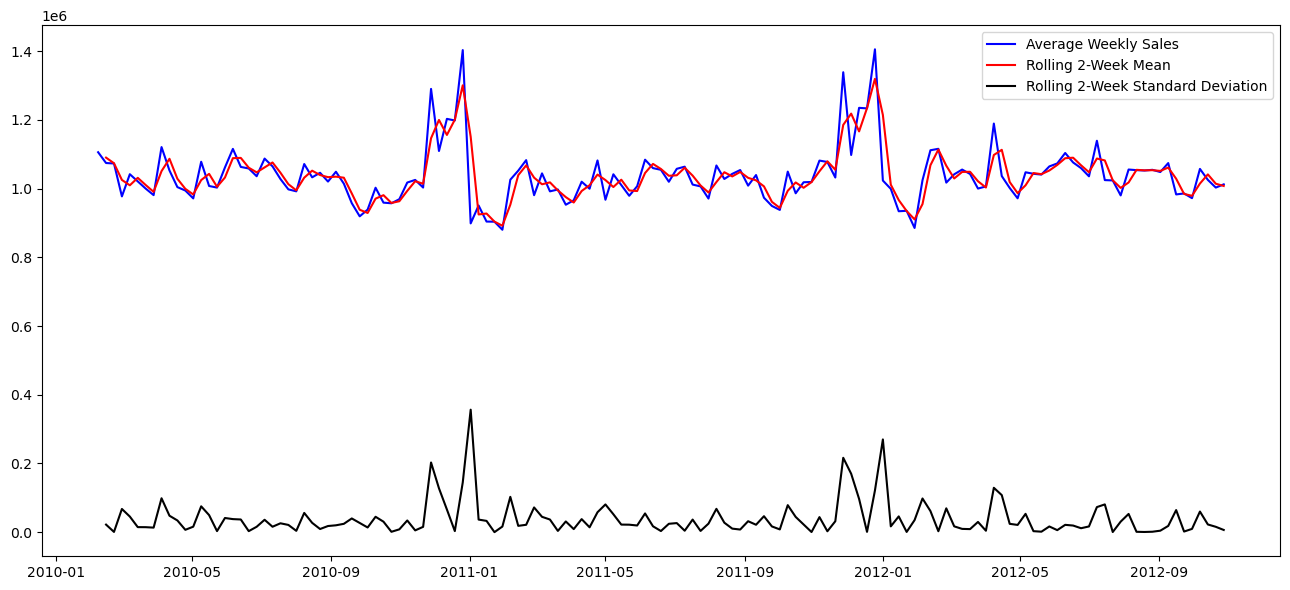

In [47]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [48]:
df_week

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-07,23.0,1.105572e+06,0.0,34.037333,2.717844,167.730885,8.619311
2010-02-14,23.0,1.074148e+06,1.0,34.151333,2.694022,167.825608,8.619311
2010-02-21,23.0,1.072822e+06,0.0,37.719778,2.672067,167.871686,8.619311
2010-02-28,23.0,9.770794e+05,0.0,39.243556,2.683933,167.909657,8.619311
2010-03-07,23.0,1.041588e+06,0.0,42.917333,2.731200,167.947628,8.619311
...,...,...,...,...,...,...,...
2012-09-30,23.0,9.718867e+05,0.0,68.754444,3.854578,176.373588,7.237333
2012-10-07,23.0,1.057036e+06,0.0,65.973111,3.845222,176.505052,6.953711
2012-10-14,23.0,1.025078e+06,0.0,58.342667,3.896733,176.636515,6.953711


# Make Data More Stationary (smoothening of mean and varience)

# 1. Difference

In [51]:
df_week_diff = df_week[['Weekly_Sales']].diff(2).dropna() #creating difference values

In [52]:
df_week_diff

,Weekly_Sales
Date,
2010-02-21,-32749.927111
2010-02-28,-97069.033333
2010-03-07,-31233.855111
2010-03-14,43485.008444
2010-03-21,-41833.236889
...,...
2012-09-30,-10914.205556
2012-10-07,71379.826667
2012-10-14,53191.441111


In [53]:
# # taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

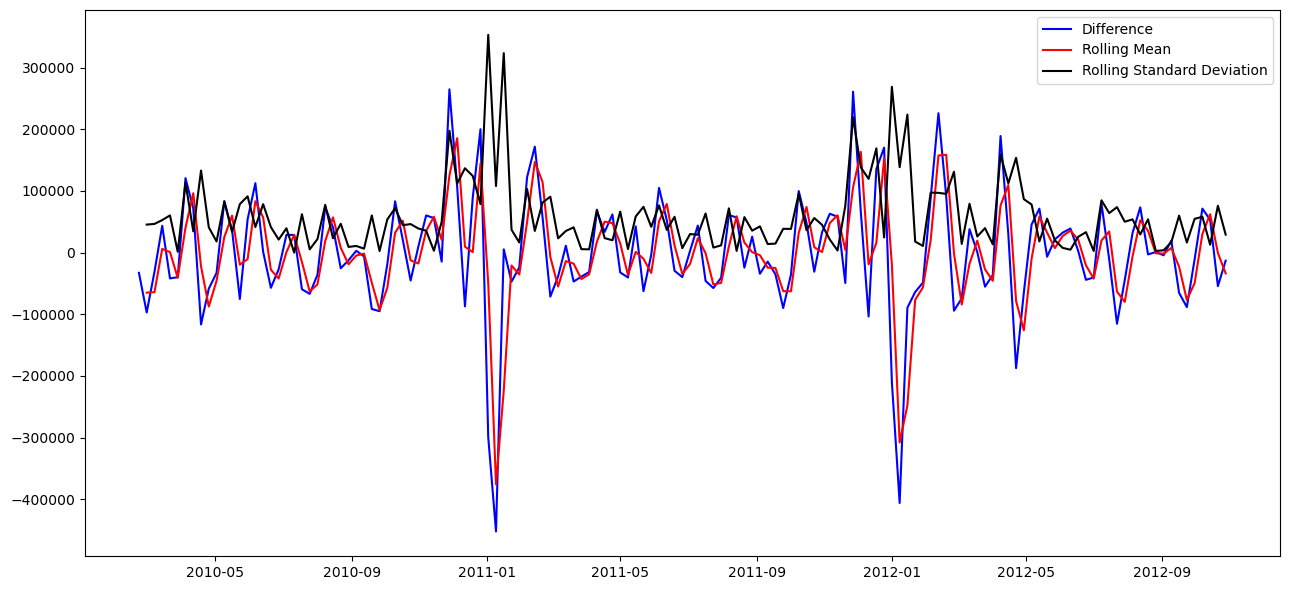

In [54]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

### 2. Shift

In [56]:
df_week_lag = df_week[['Weekly_Sales']].shift().dropna() #shifting the data 

In [57]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

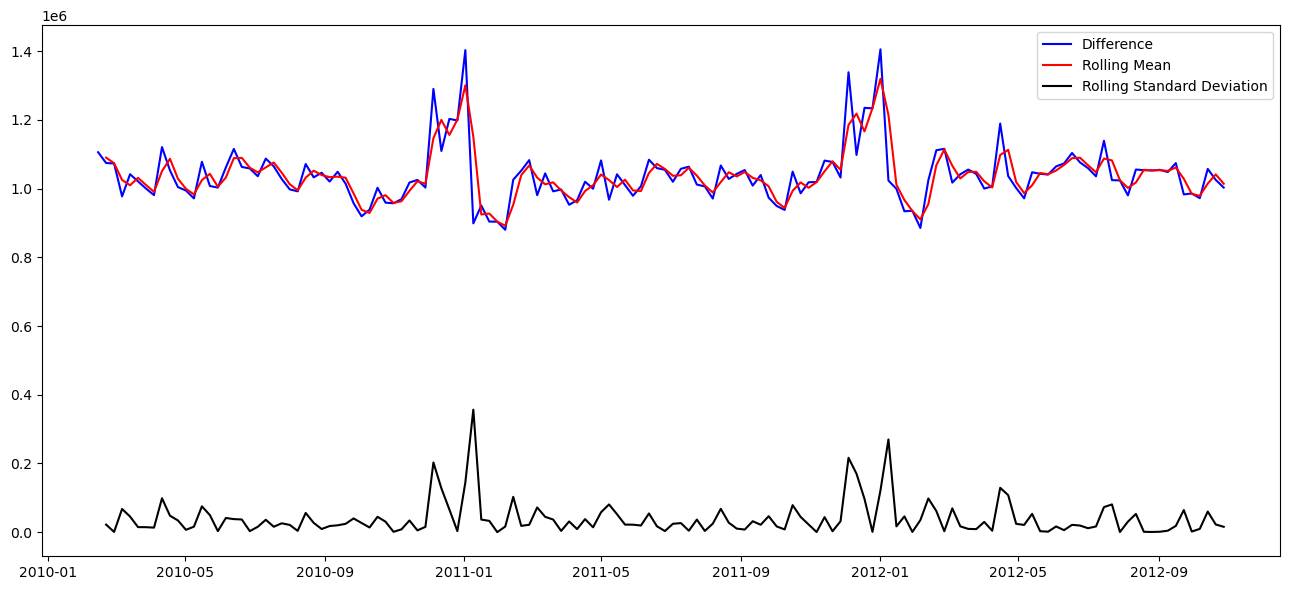

In [58]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

### 3. Log

In [60]:
logged_week = np.log1p(df_week[['Weekly_Sales']]).dropna() #taking log of data


In [61]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

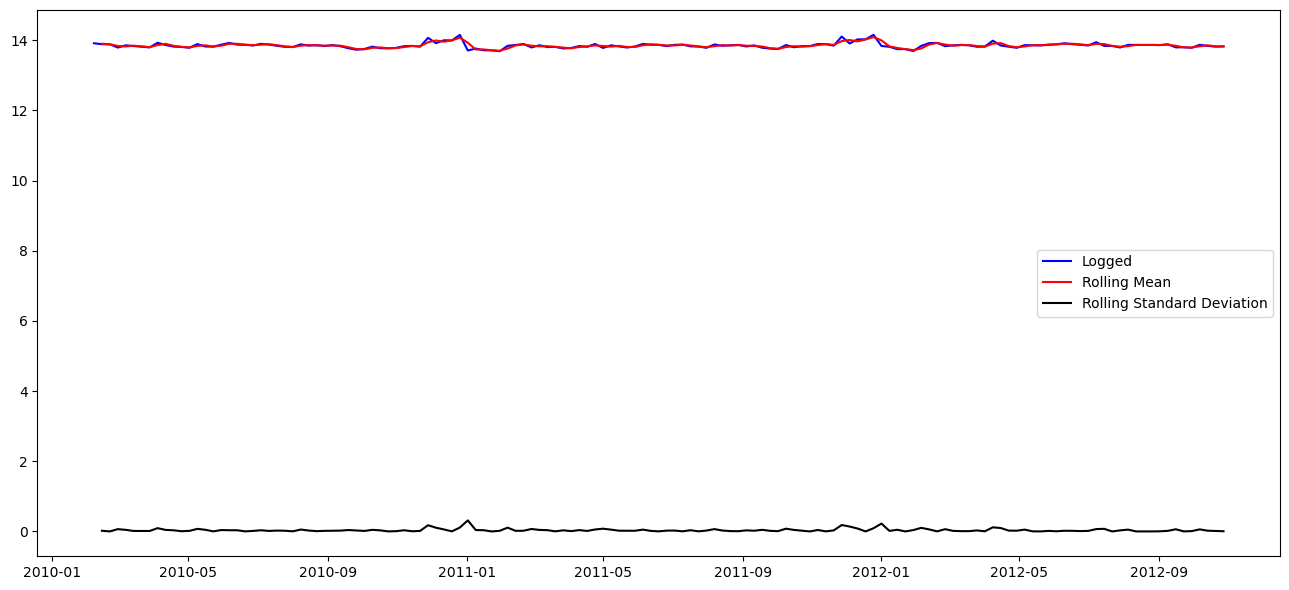

In [62]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

### Auto-ARIMA MODEL

In [64]:
data = logged_week[['Weekly_Sales']]

In [65]:
data = data.dropna()
data

,Weekly_Sales
Date,
2010-02-07,13.915874
2010-02-14,13.887040
2010-02-21,13.885804
2010-02-28,13.792324
2010-03-07,13.856258
...,...
2012-09-30,13.786995
2012-10-07,13.870981
2012-10-14,13.840280


In [66]:
# splitting the data
train_data = data[:int(0.8*(len(data['Weekly_Sales'])))]
test_data = data[int(0.8*(len(data['Weekly_Sales']))):]

In [67]:
train_data.shape

(114, 1)

In [68]:
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-244.928, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-256.769, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-266.848, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-266.881, Time=0.39 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=-286.711, Time=0.39 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=-285.157, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-265.012, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-264.223, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-265.015, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-263.618, Time=0.53 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-284.780, Time=0.78 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-266.937, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-268.541, Time=0.78 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=-267.434, Time=1.72 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-268.423, Time=0.68 sec
 ARIMA(3,0

ARIMA(maxiter=200, order=(0, 0, 4), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

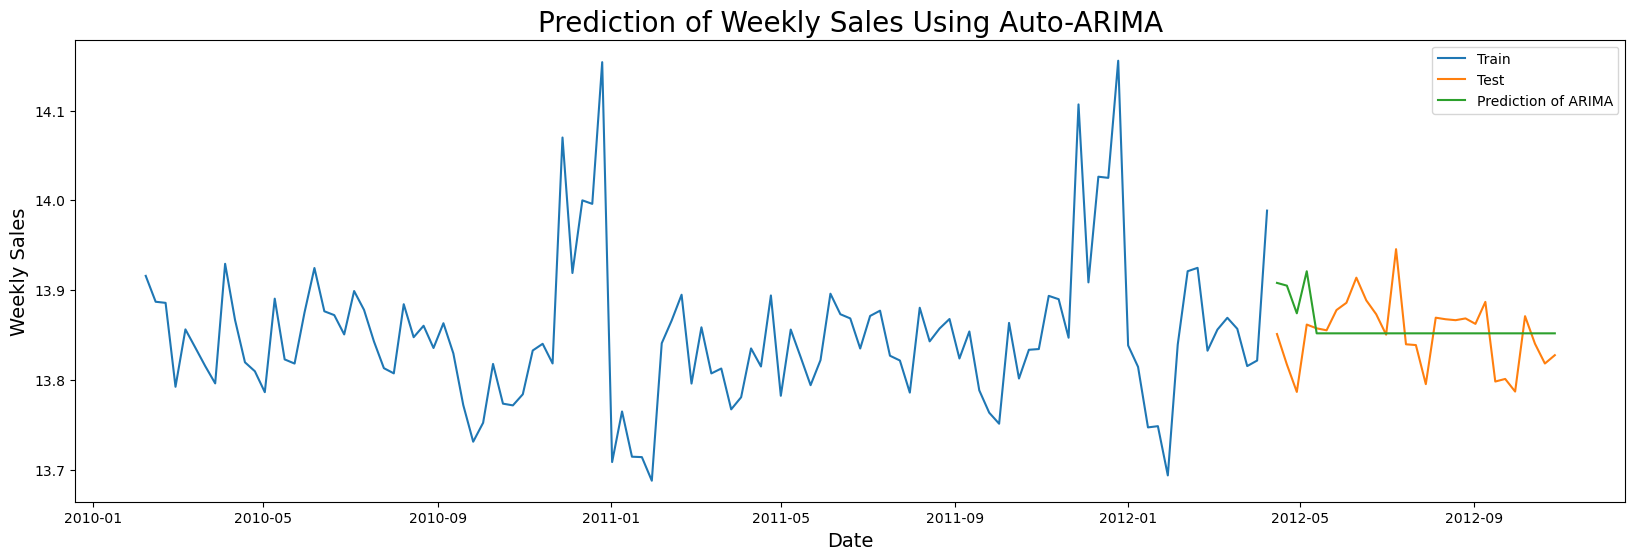

In [69]:
y_pred = model_auto_arima.predict(n_periods=len(test_data))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
# plot ACF and PACF

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

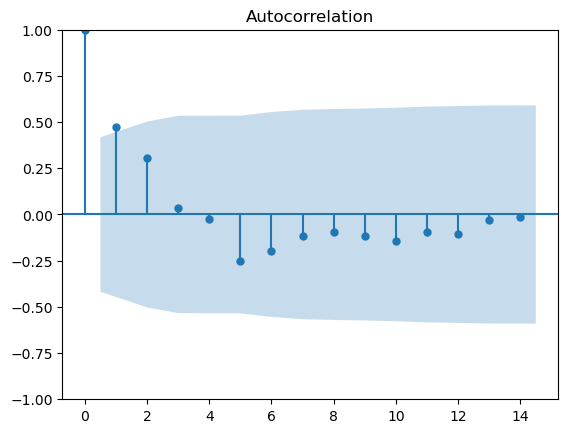

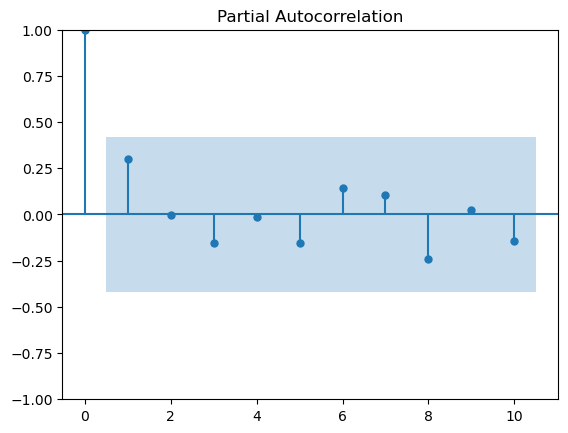

In [71]:
acf_plot=acf(data)
pacf_plot=pacf(data)
plot_acf(acf_plot);
plot_pacf(pacf_plot, lags=10, method="ywm");

 prediction by Auto_arima is not satisfying it could be because of seasonality

will try SARIMAX model

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [73]:
model_sar=SARIMAX(train_data,order=(4,1,2),seasonal_order=(1,0,0,52)) # 52 weeks in a year
model_sar=model_sar.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

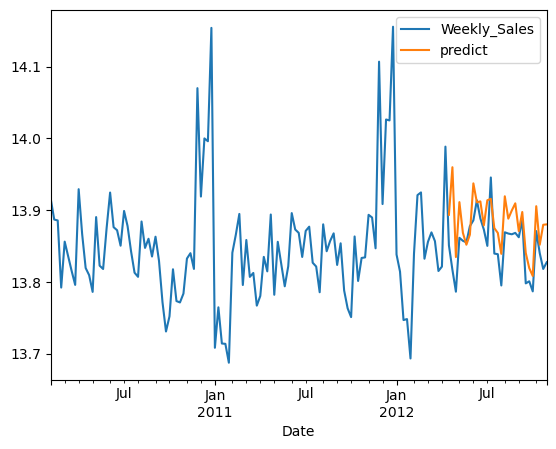

In [74]:
data['predict']=model_sar.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=True)
data[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

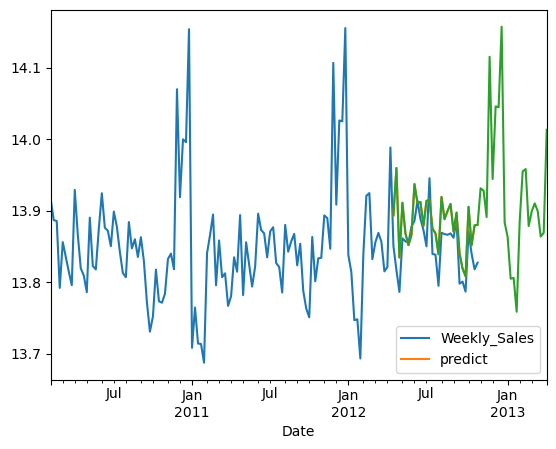

In [75]:
forecast=model_sar.forecast(steps=52)
data.plot()
forecast.plot()

In this analysis SARIMAX model predict and forecasted satifying result for the logged data which gives 
smooth curve of mean and std compare to differencing and shift